In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/DL_Lab_02/bodyfat.csv')

In [ ]:
df.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
X =  df.drop('BodyFat',axis=1)
y = df['BodyFat']

In [ ]:
 from sklearn.preprocessing import MinMaxScaler
 X_scale = MinMaxScaler().fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(176, 14) (38, 14) (38, 14) (176,) (38,) (38,)


In [ ]:

Hidden = [[128,0,0],[128,64,0],[128,64,32]]
Activation = ['relu', 'sigmoid']
Learning_rate = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
Regularizers = ['l1','l2']
Epoch = [10,20,30,40]
i_dict={}
j_dict={}
k_dict={}
r_dict={}
l_dict={}

In [ ]:
for i in Activation:
     for l1,l2,l3 in Hidden:
          for r in Regularizers:
              model=tf.keras.Sequential()
              model.add(tf.keras.layers.Dense(256,input_shape=[14,],activation=i))
              model.add(tf.keras.layers.Dense(l1,activation=i,kernel_regularizer=r))
              model.add(tf.keras.layers.Dense(l2,activation=i,kernel_regularizer=r))
              model.add(tf.keras.layers.Dense(l3,activation=i,kernel_regularizer=r))
              model.add(tf.keras.layers.Dense(20,activation=i,kernel_regularizer=r))
              for j in Learning_rate:
                  model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=j),metrics=[tf.keras.metrics.RootMeanSquaredError()])
                  for k in Epoch:
                      history=model.fit(X_train,Y_train,batch_size=20,epochs=k,validation_data=(X_val,Y_val))    
                      i_dict[i]=history
                      j_dict[j]=history
                      k_dict[k]=history
                      r_dict[r]=history  
                      l_dict[(l1,l2,l3)]=history

Streaming output truncated to the last 5000 lines.
9/9 [==============================] - 1s 31ms/step - loss: 404.7451 - root_mean_squared_error: 20.1182 - val_loss: 417.2938 - val_root_mean_squared_error: 20.4277
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 404.7437 - root_mean_squared_error: 20.1182 - val_loss: 417.2932 - val_root_mean_squared_error: 20.4277
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 404.7433 - root_mean_squared_error: 20.1182 - val_loss: 417.2931 - val_root_mean_squared_error: 20.4277
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 404.7432 - root_mean_squared_error: 20.1182 - val_loss: 417.2930 - val_root_mean_squared_error: 20.4277
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 404.7432 - root_mean_squared_error: 20.1182 - val_loss: 417.2929 - val_root_mean_squared_error: 20.4277
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 404.7431 - root_mea

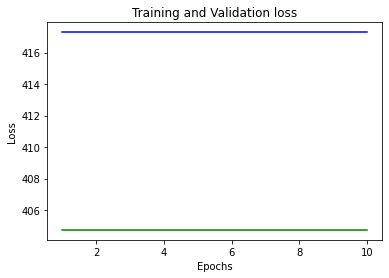

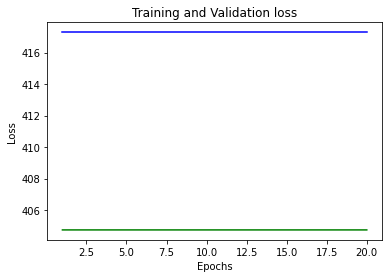

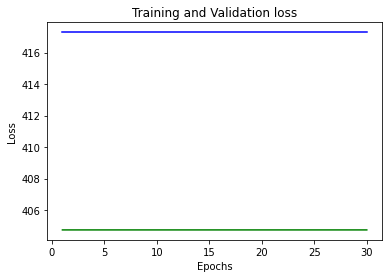

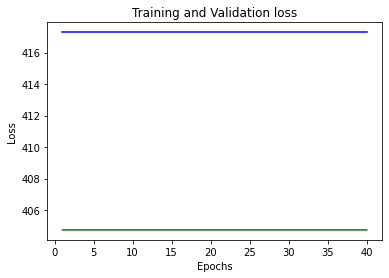

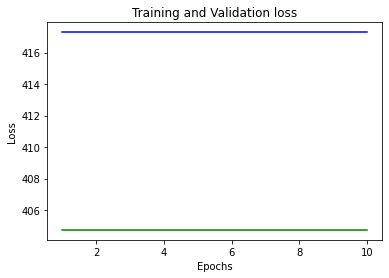

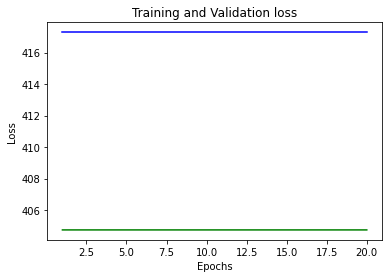

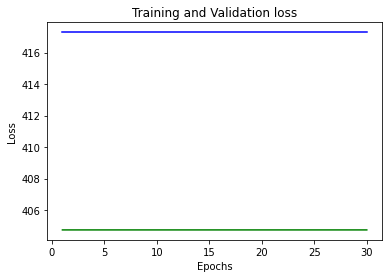

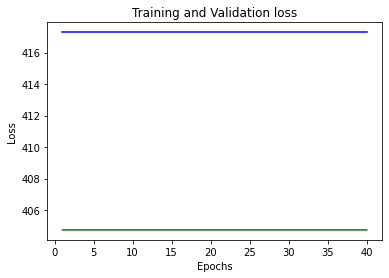

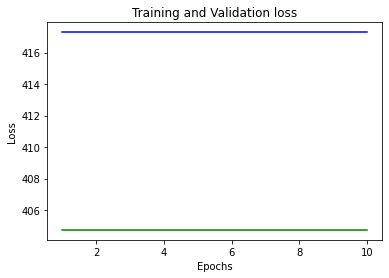

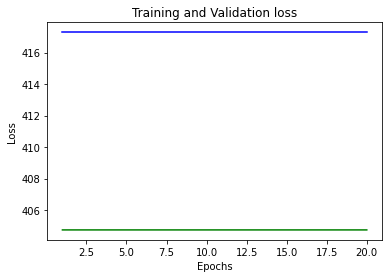

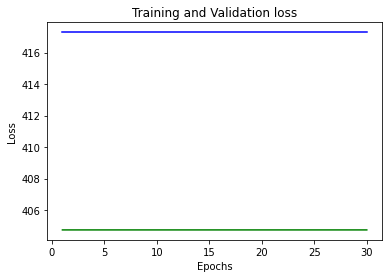

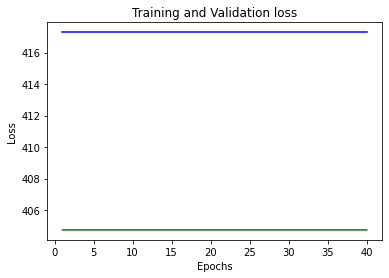

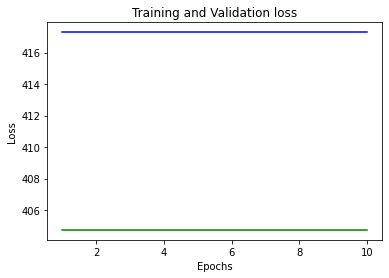

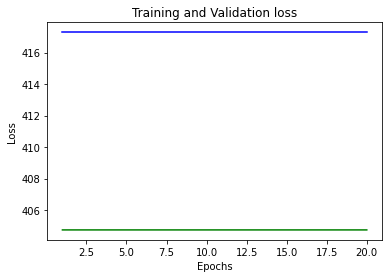

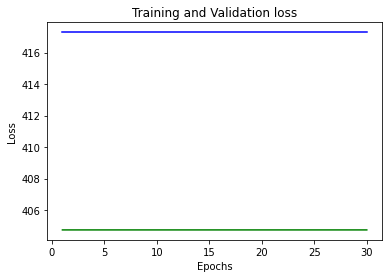

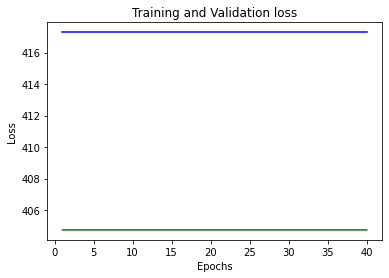

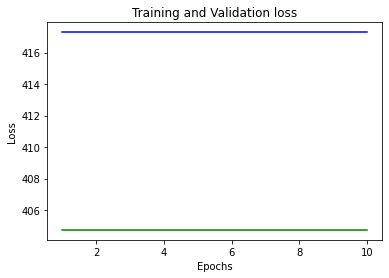

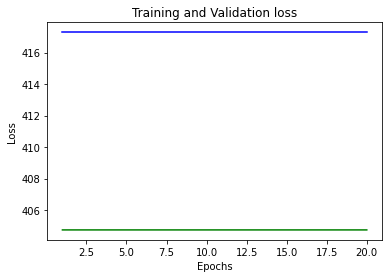

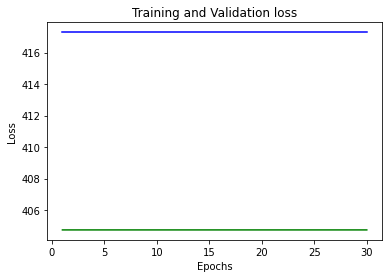

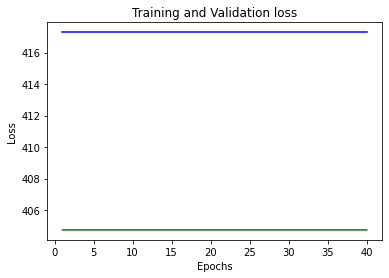

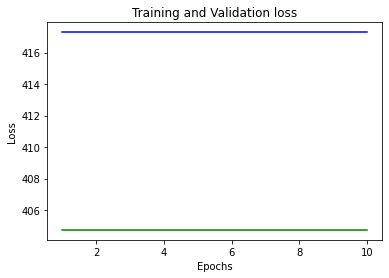

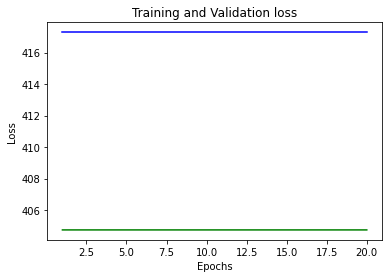

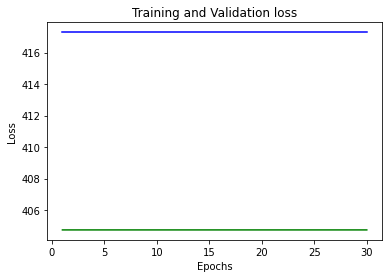

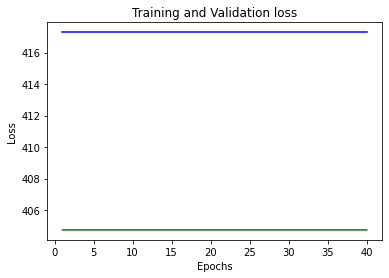

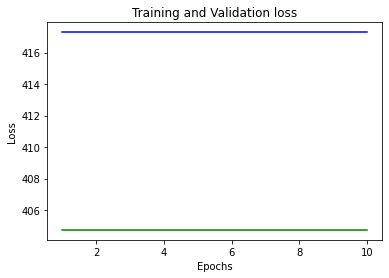

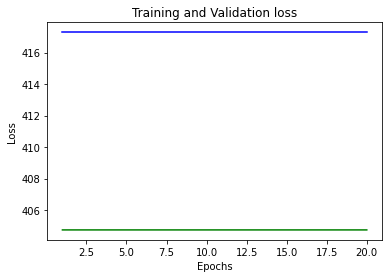

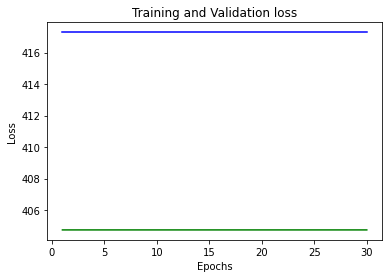

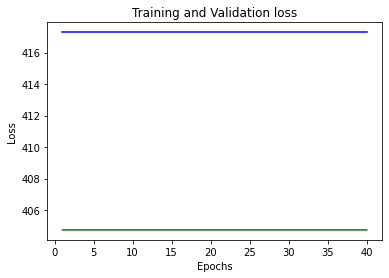

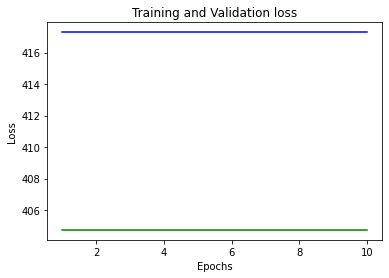

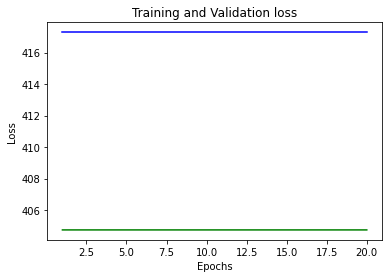

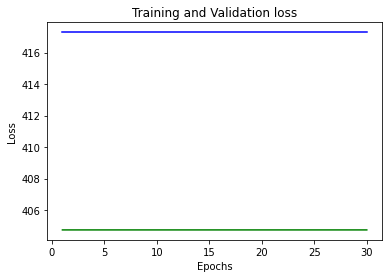

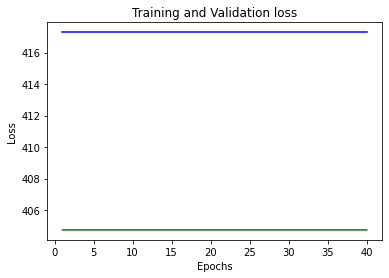

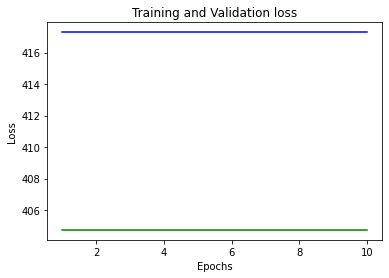

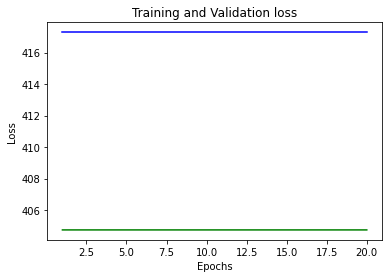

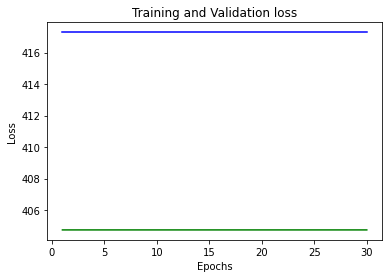

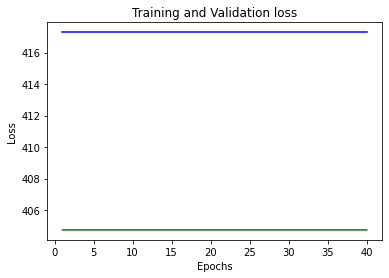

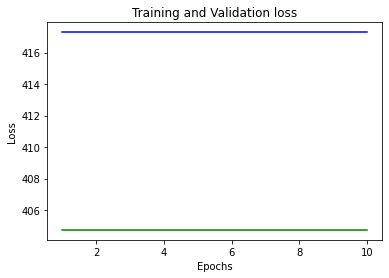

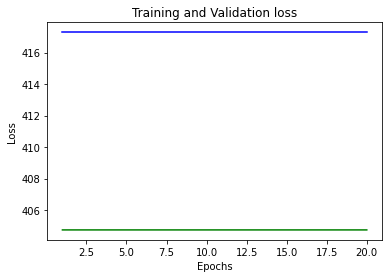

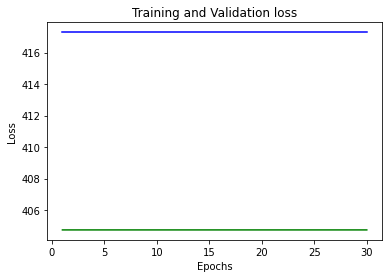

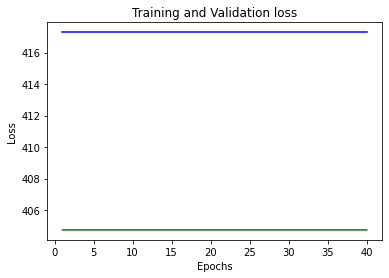

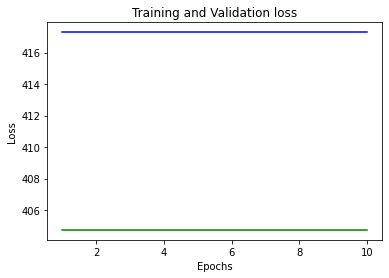

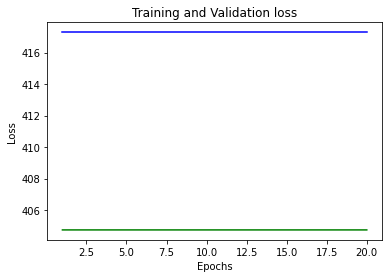

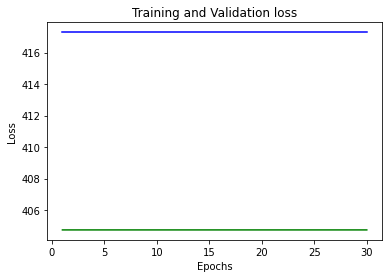

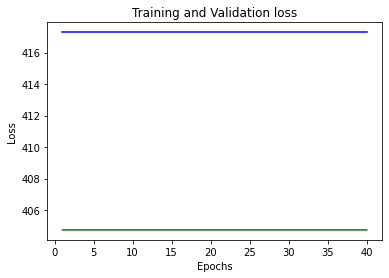

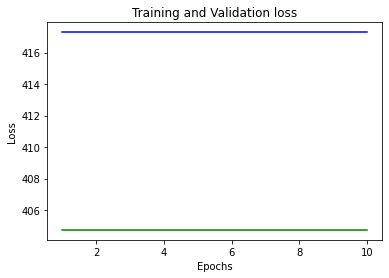

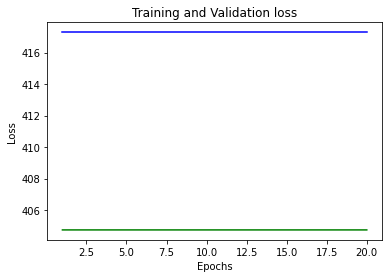

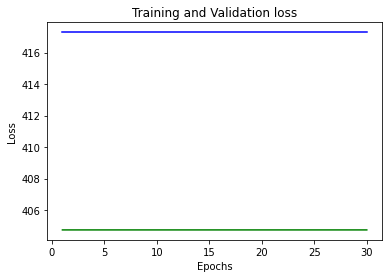

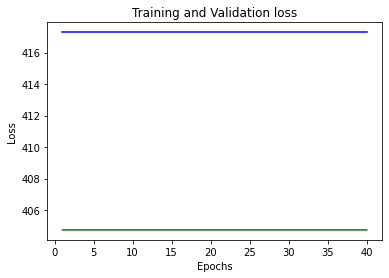

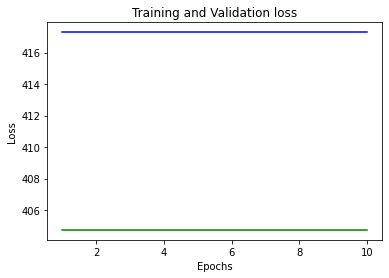

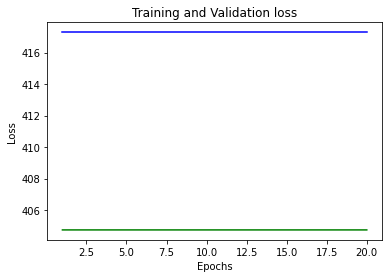

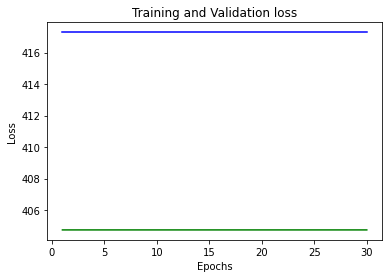

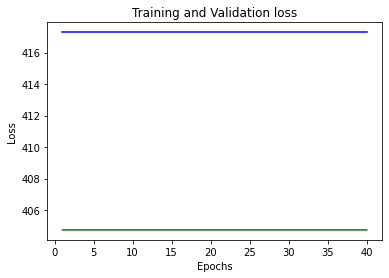

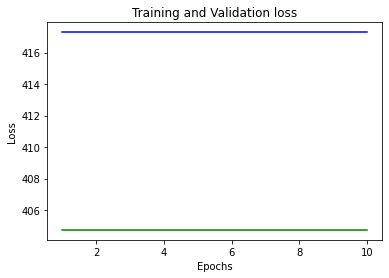

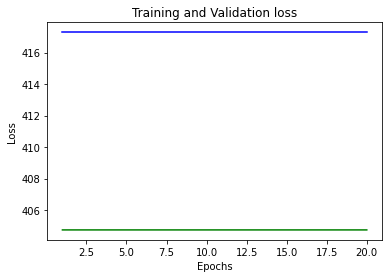

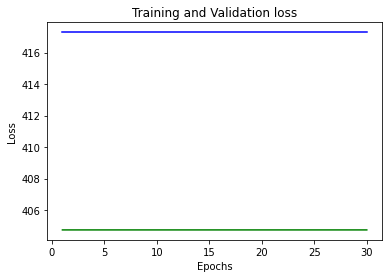

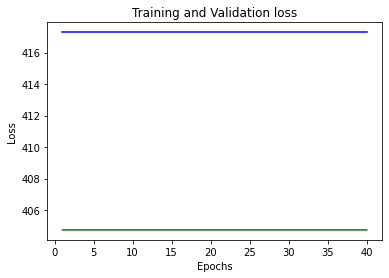

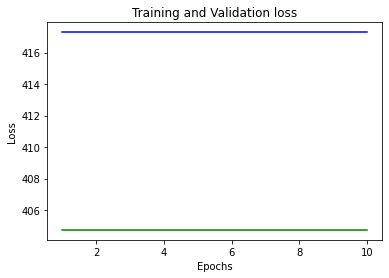

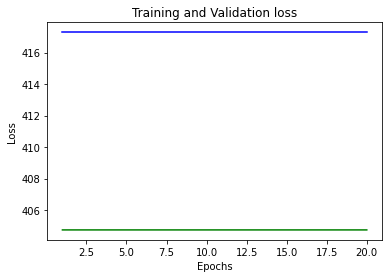

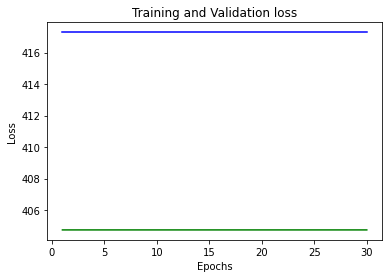

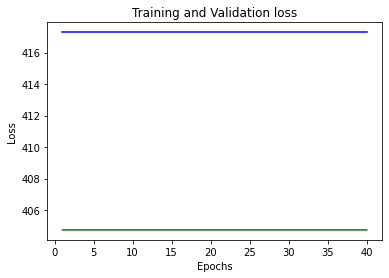

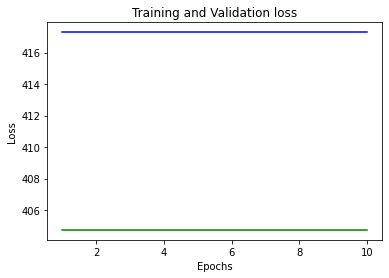

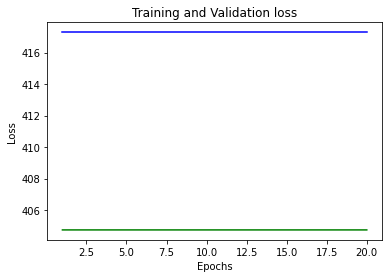

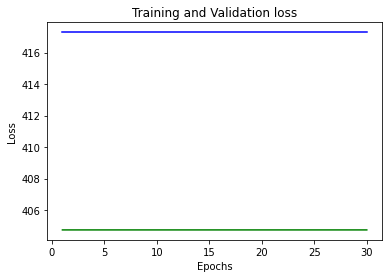

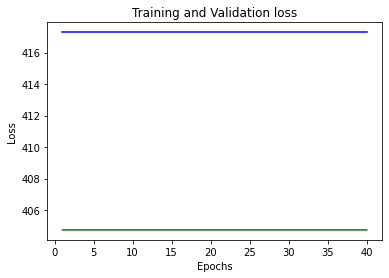

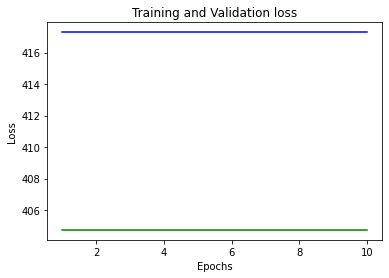

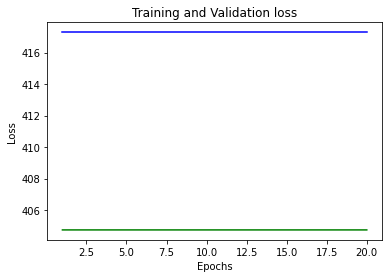

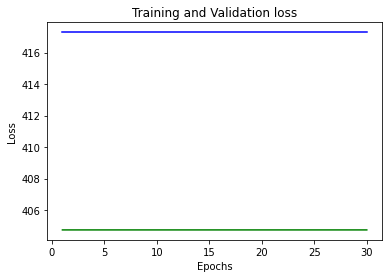

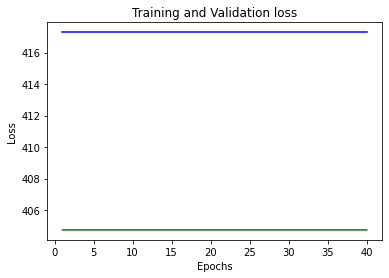

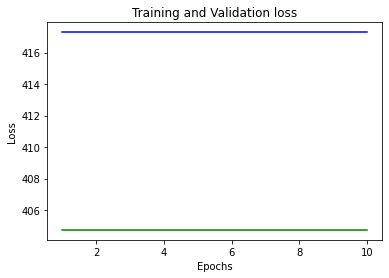

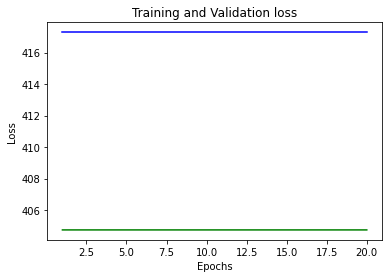

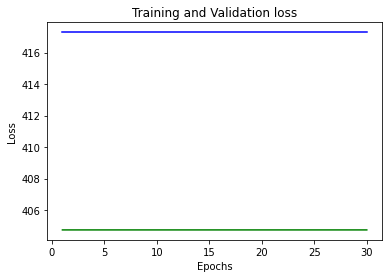

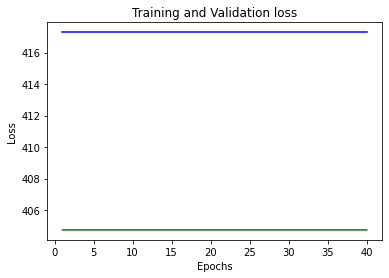

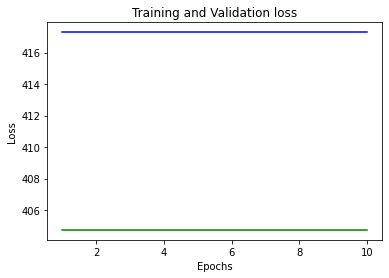

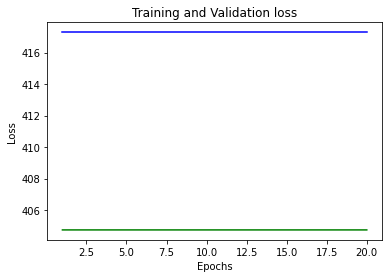

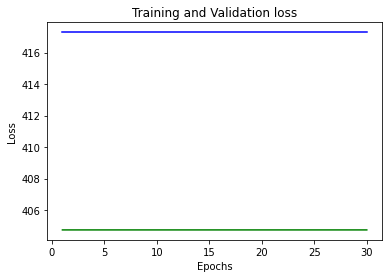

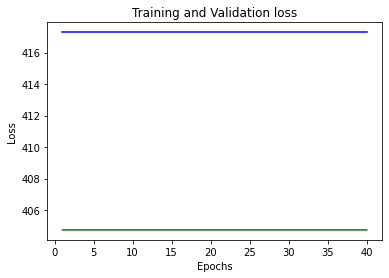

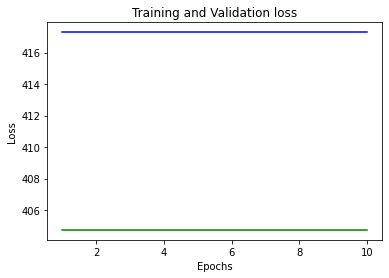

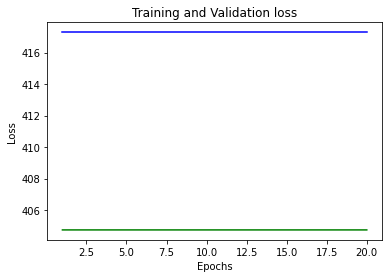

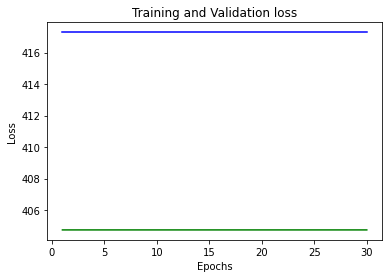

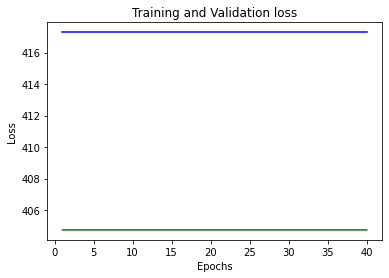

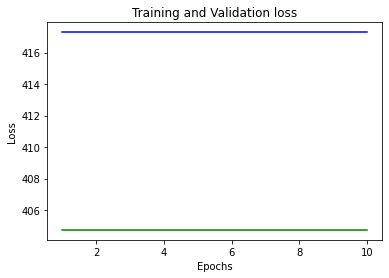

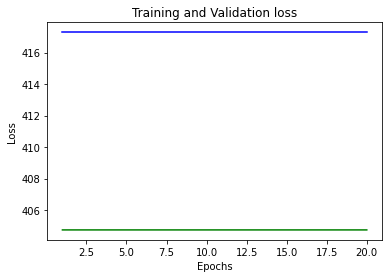

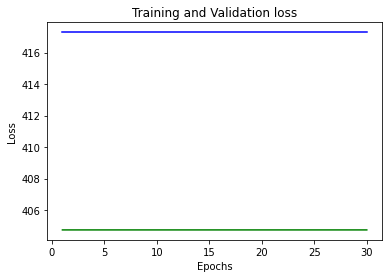

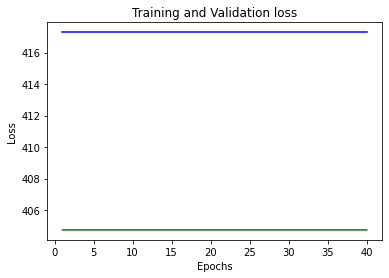

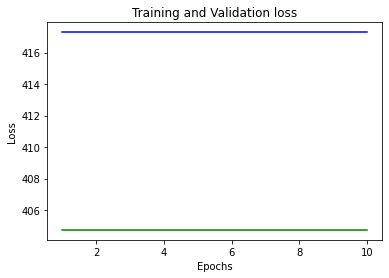

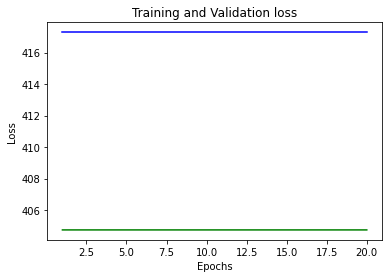

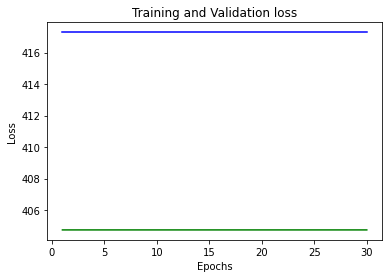

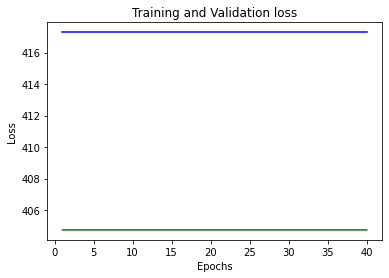

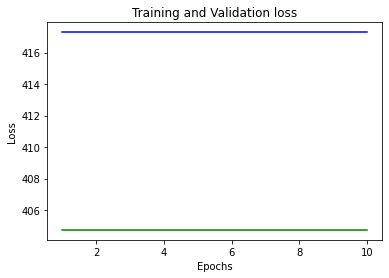

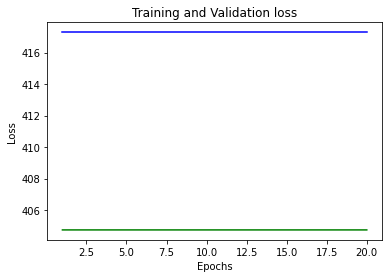

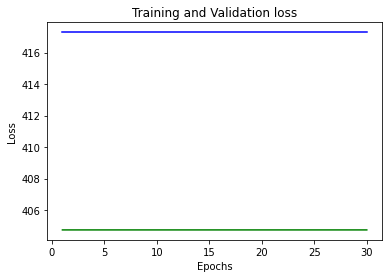

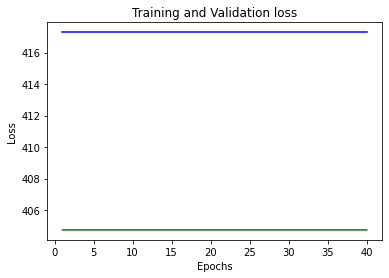

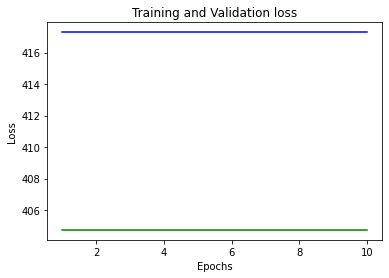

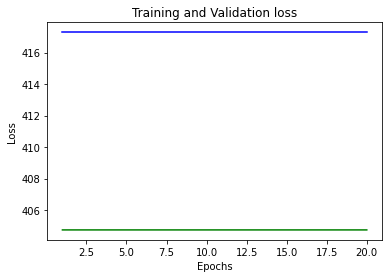

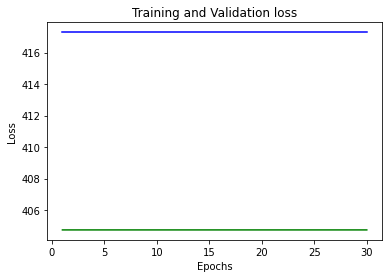

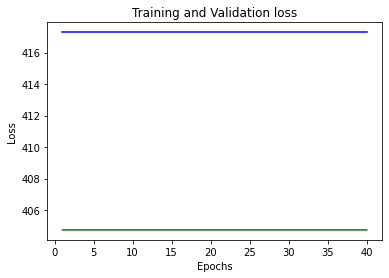

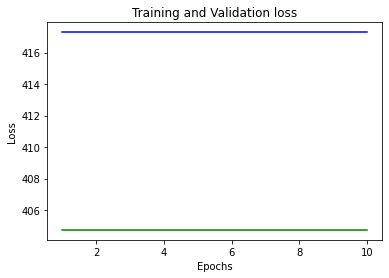

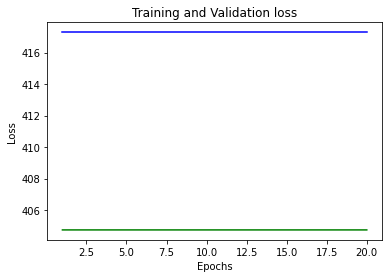

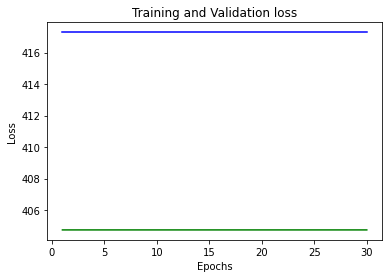

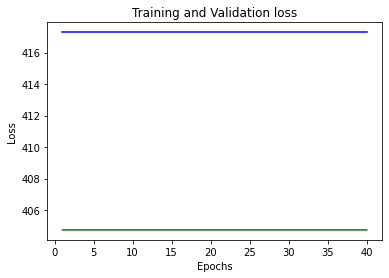

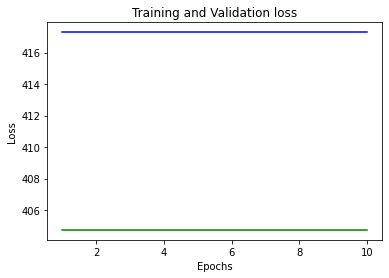

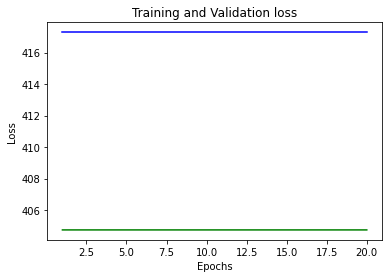

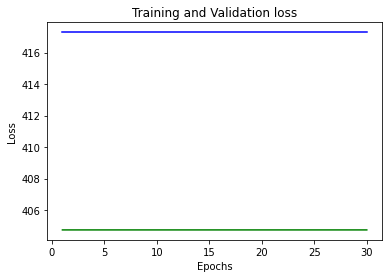

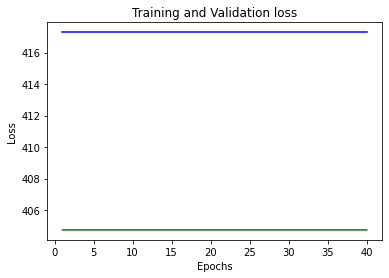

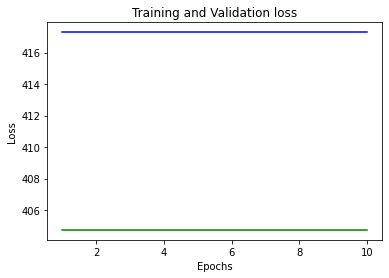

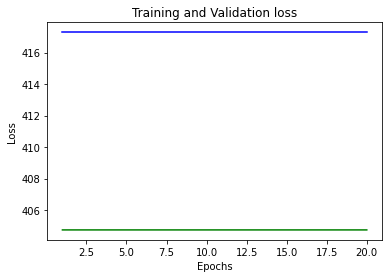

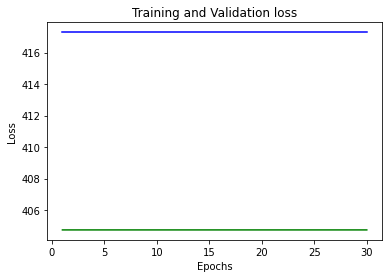

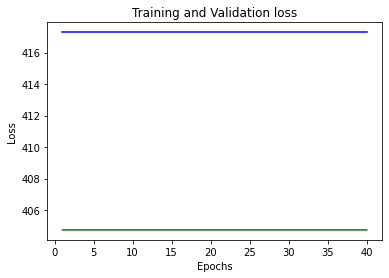

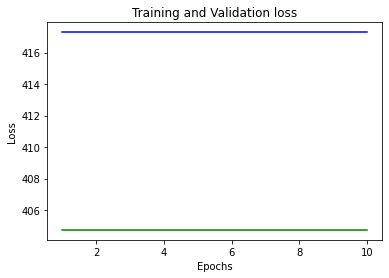

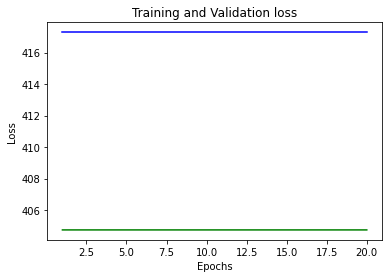

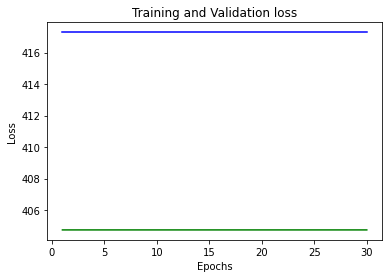

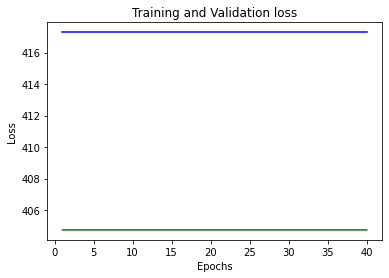

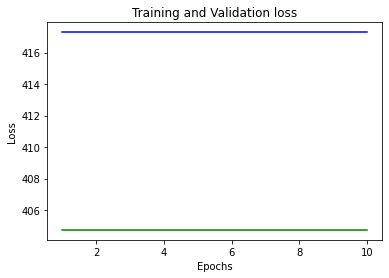

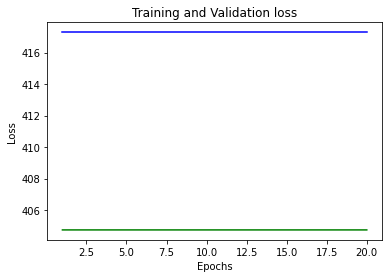

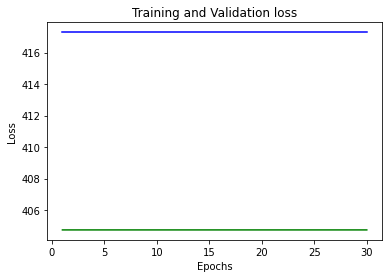

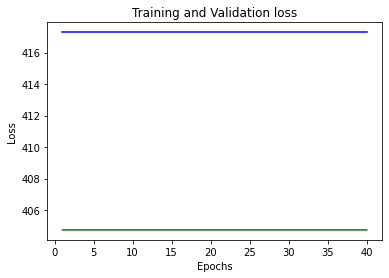

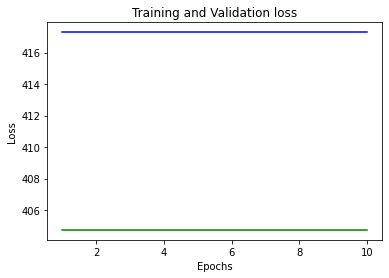

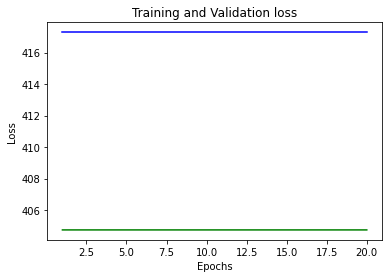

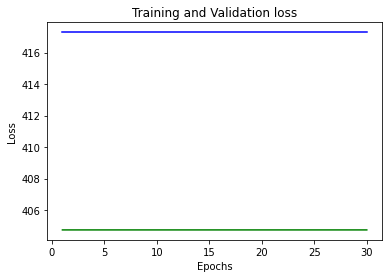

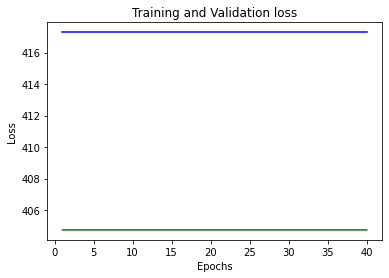

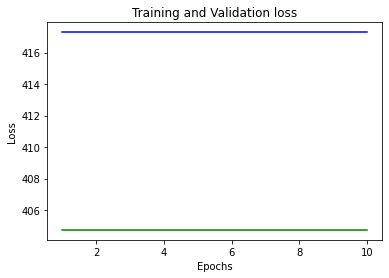

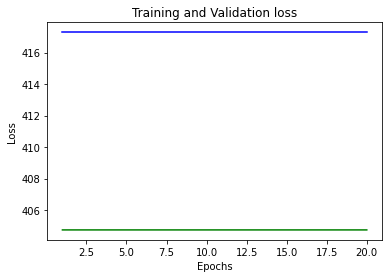

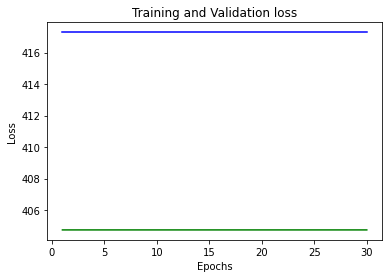

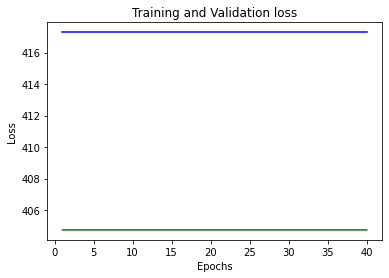

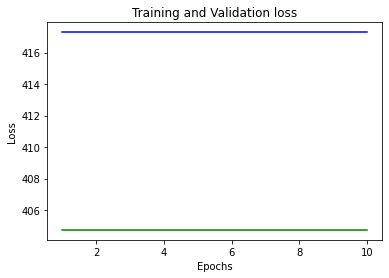

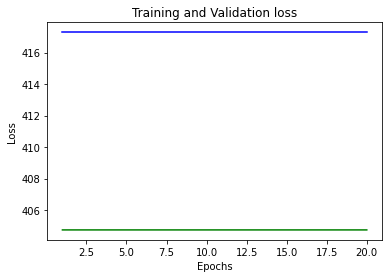

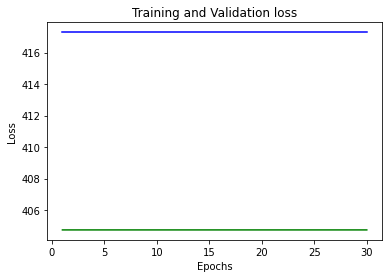

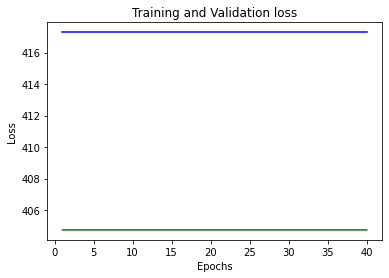

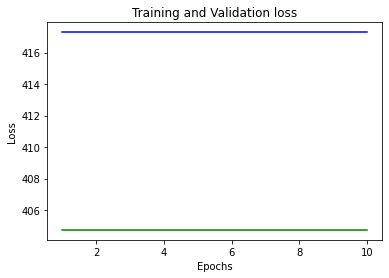

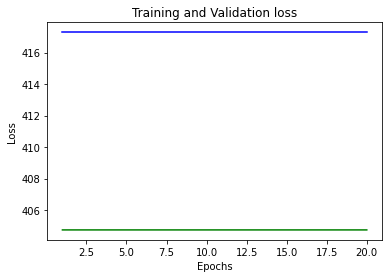

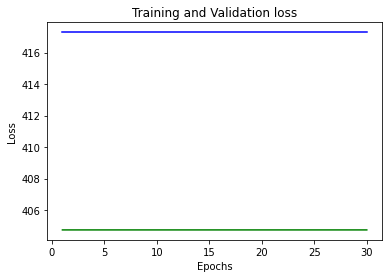

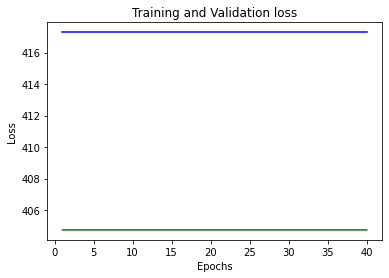

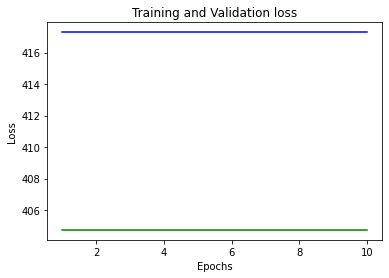

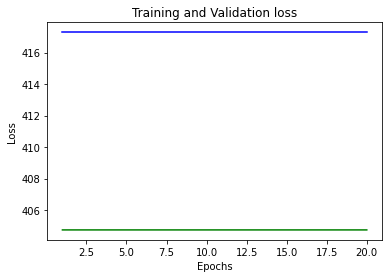

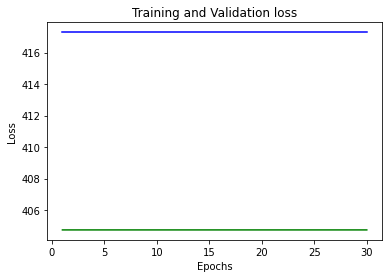

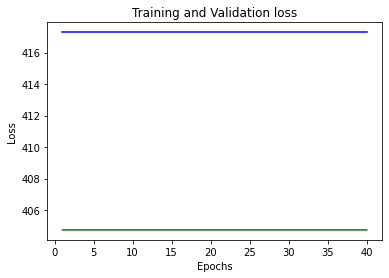

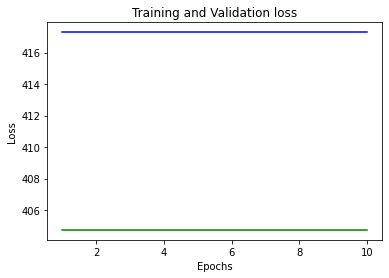

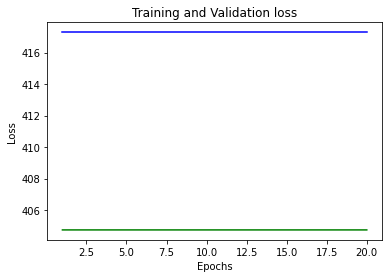

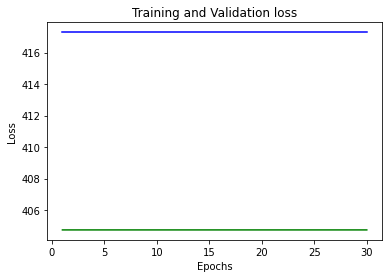

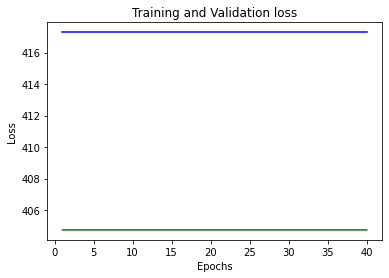

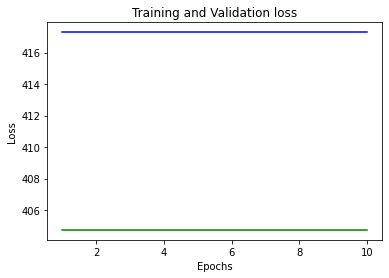

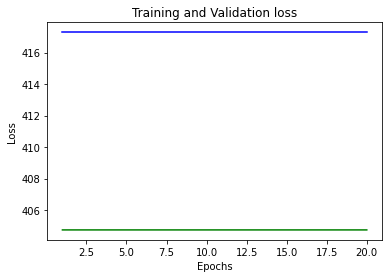

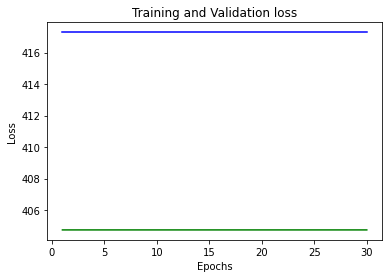

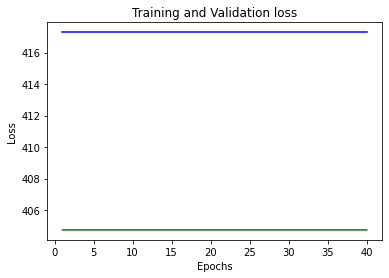

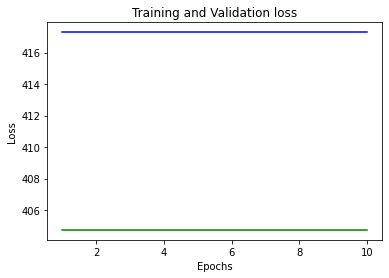

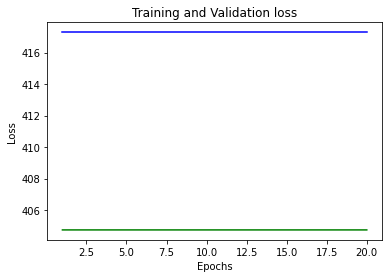

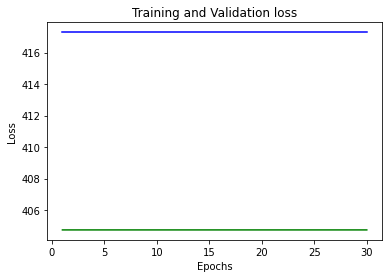

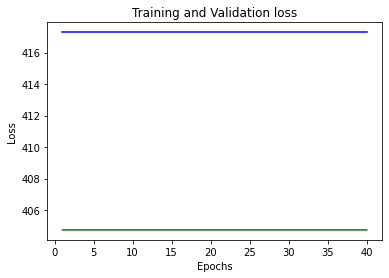

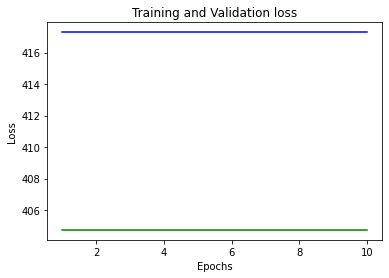

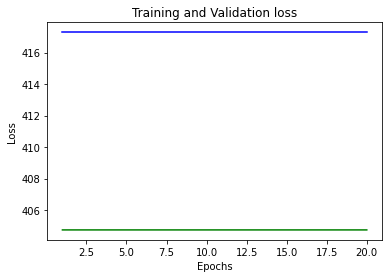

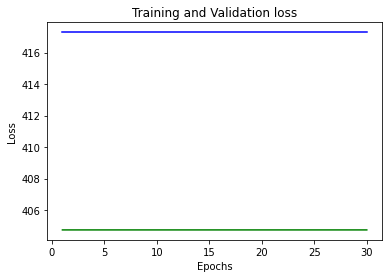

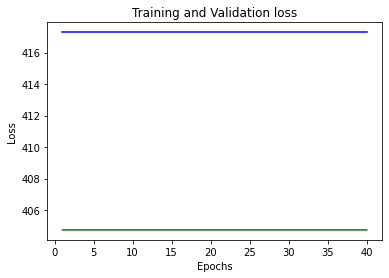

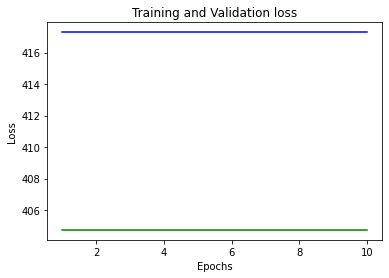

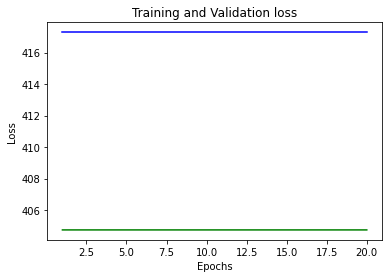

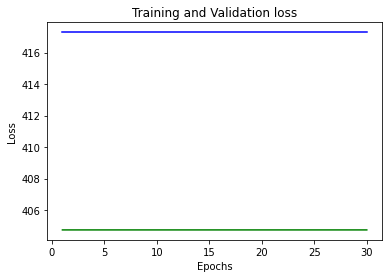

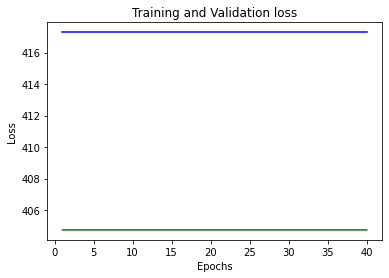

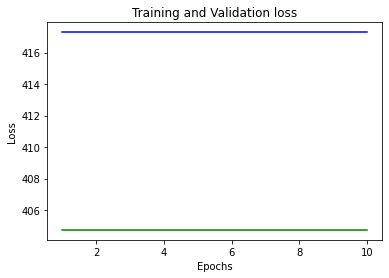

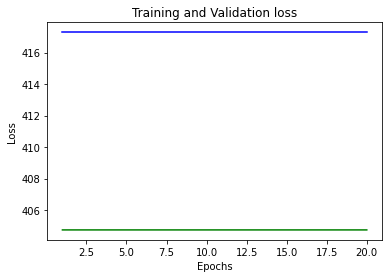

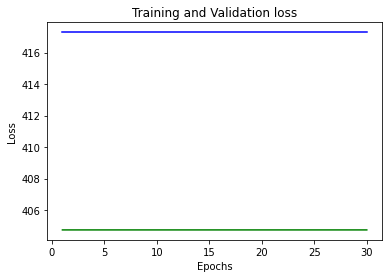

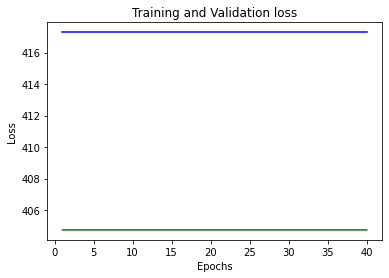

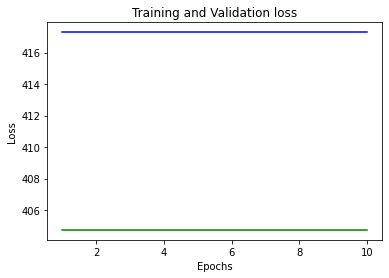

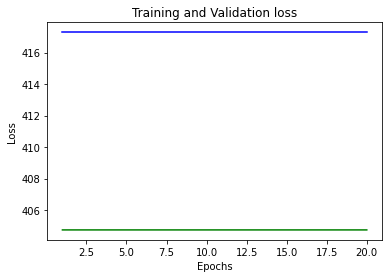

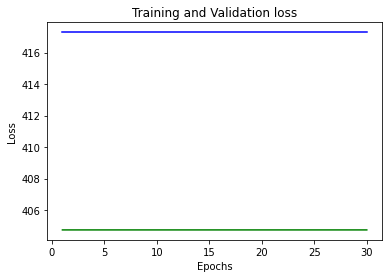

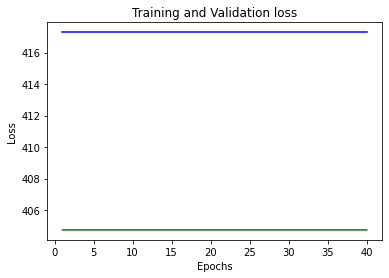

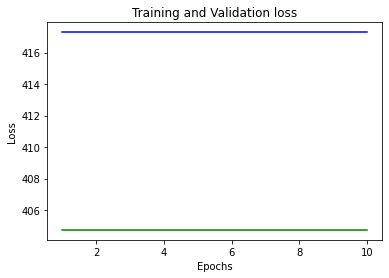

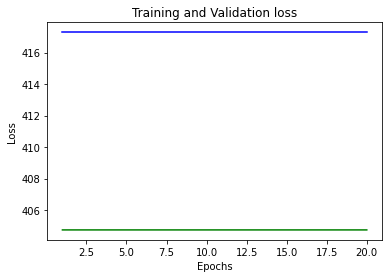

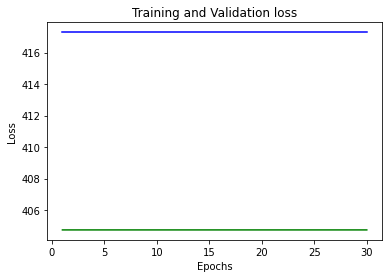

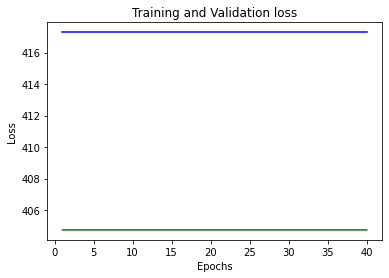

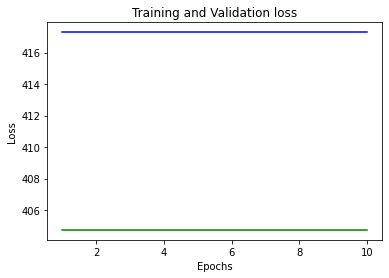

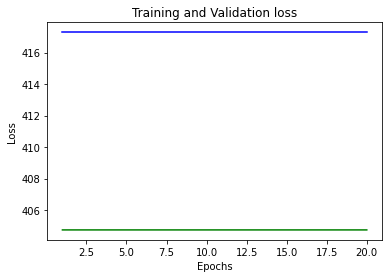

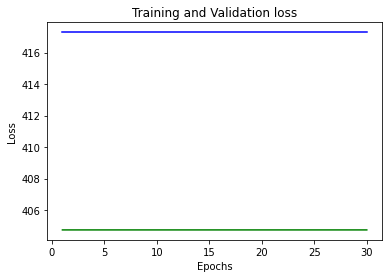

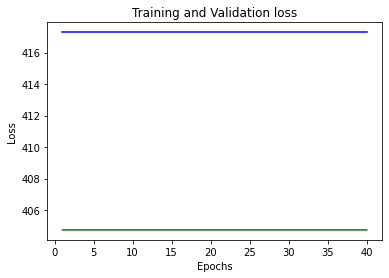

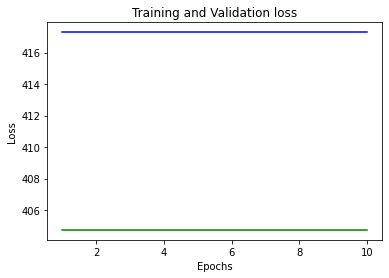

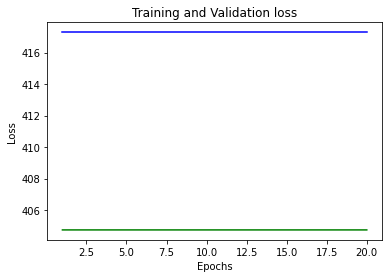

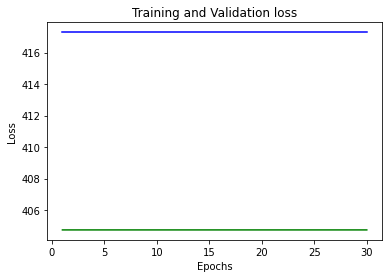

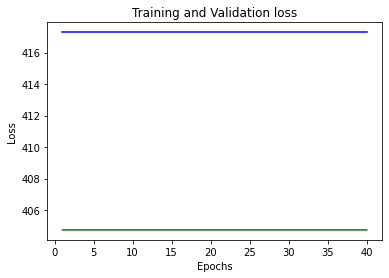

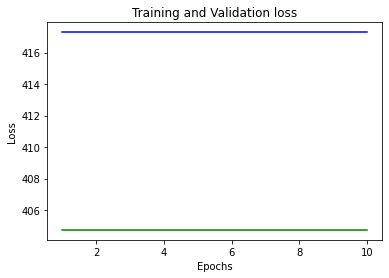

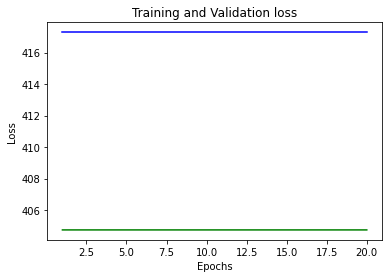

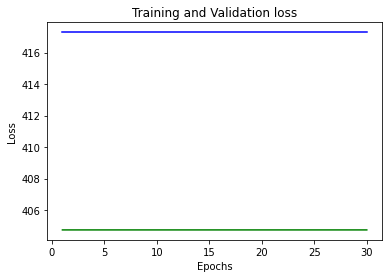

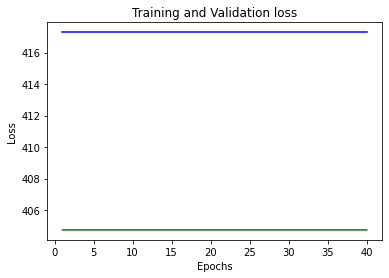

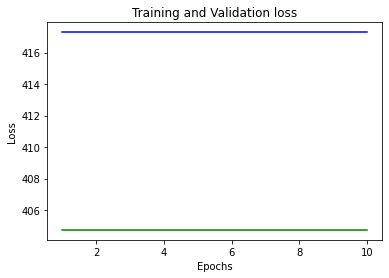

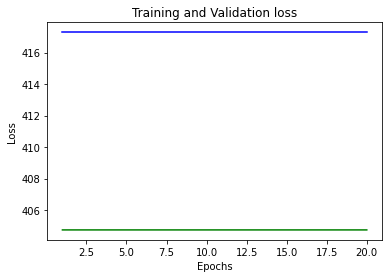

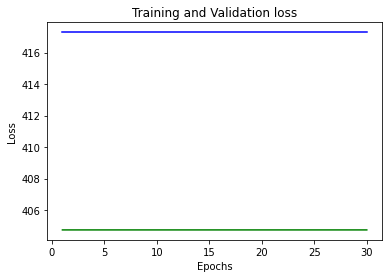

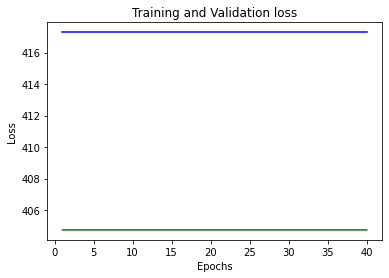

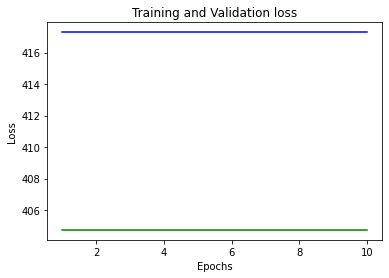

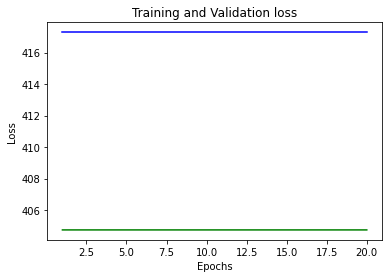

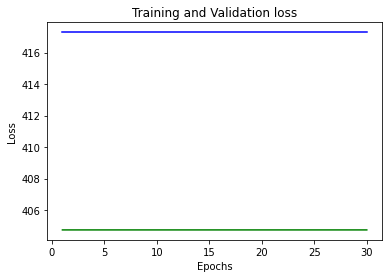

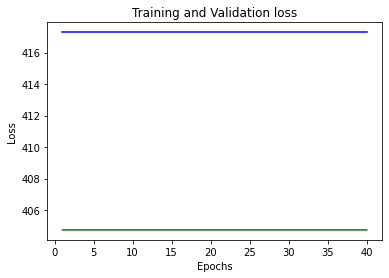

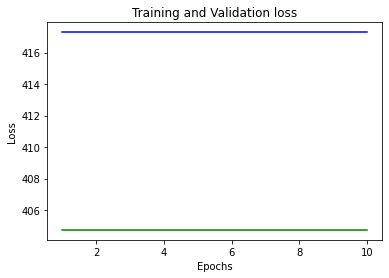

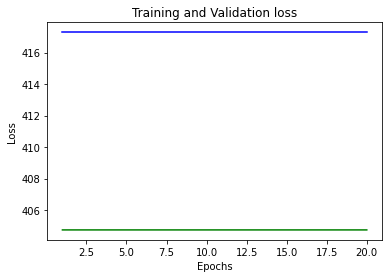

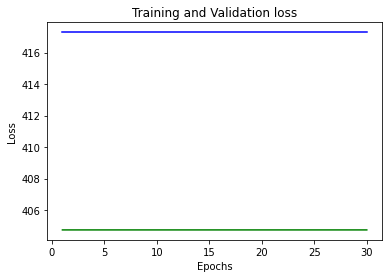

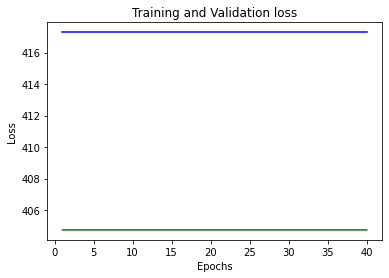

In [ ]:
#summarize history for loss
for k,v in i_dict.items():
  for k1,v1 in l_dict.items():
    for k2,v2 in j_dict.items():
      for k3,v3 in k_dict.items():
          Epoch=range(1,k3+1)
          plt.plot(Epoch, v3.history['loss'], 'g', label='Training loss')
          plt.plot(Epoch, v3.history['val_loss'], 'b', label='validation loss')
          plt.title('Training and Validation loss')
          plt.xlabel('Epochs')
          plt.ylabel('Loss')
          plt.show()